<a href="https://colab.research.google.com/github/ZahraEk/Digital-Image-Proccesing/blob/main/DIP_EXC3_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




import Required libraries :

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Q2_A (Median Filter) :

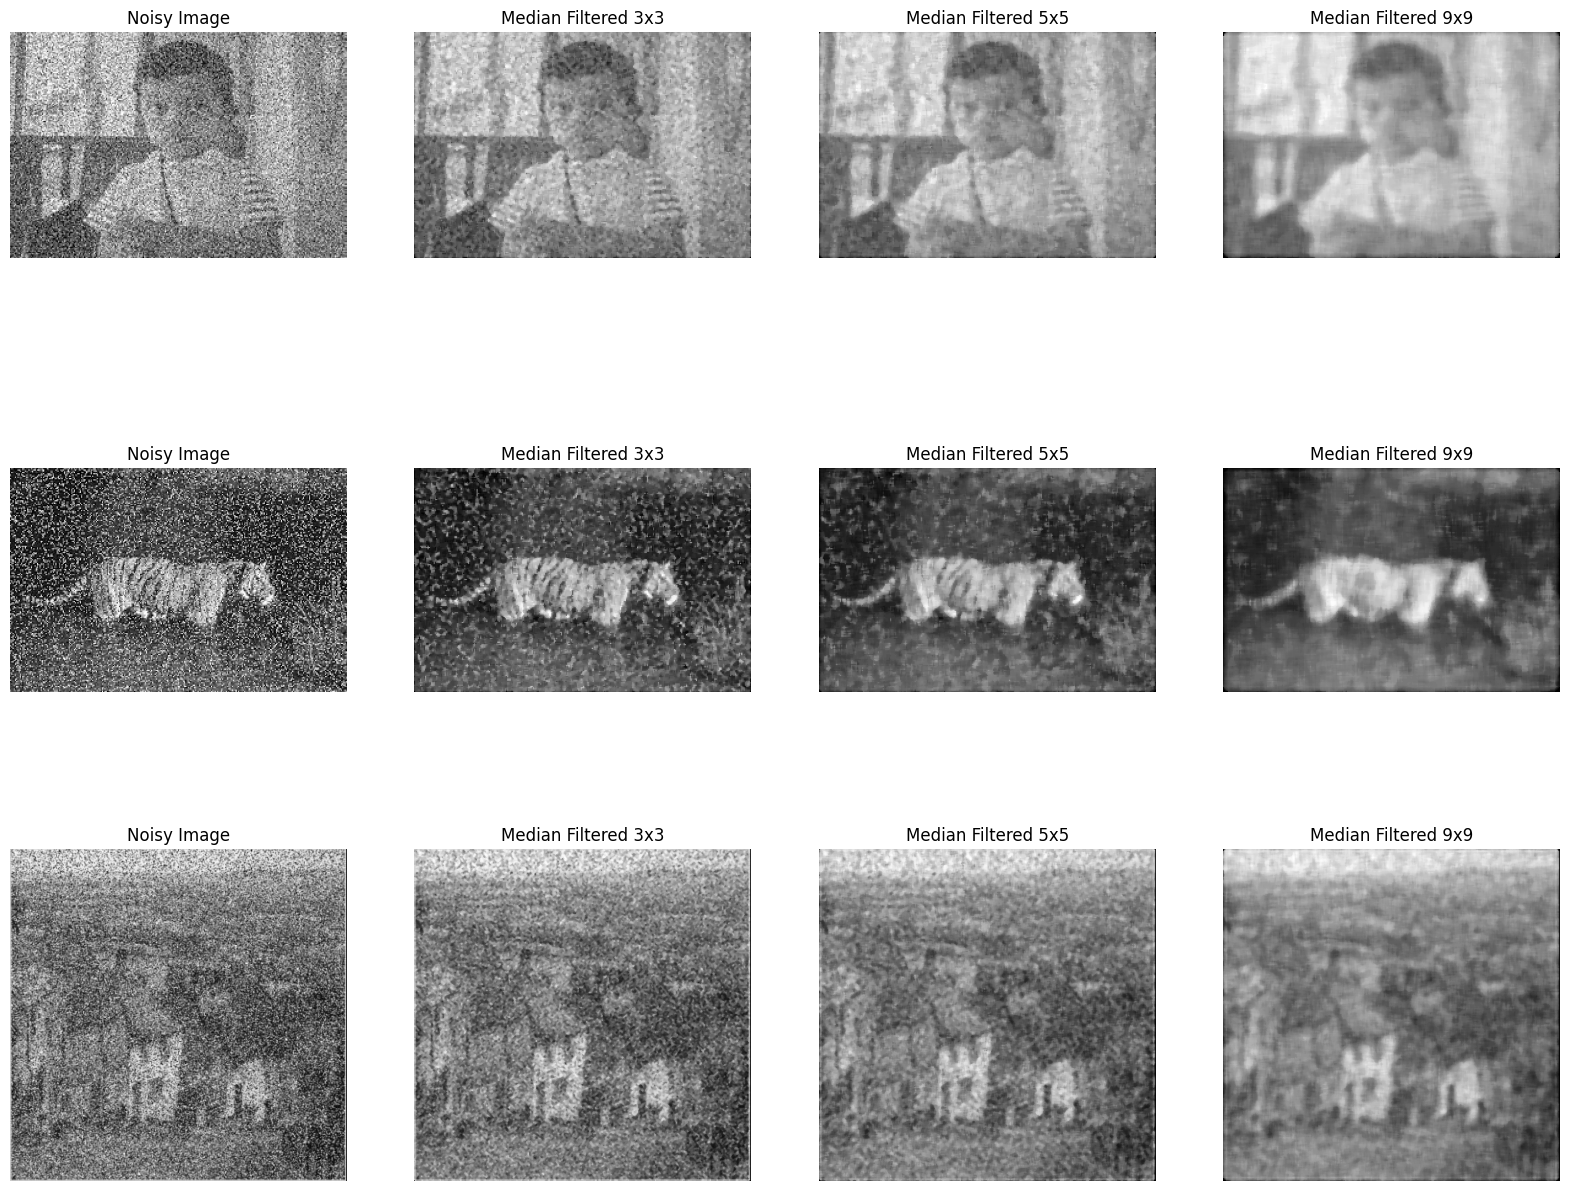

In [ ]:
#Read images
img1 = cv2.imread("drive/MyDrive/DIP_EXC3/Q2/Q2_img1.jpg",0)
img2 = cv2.imread("drive/MyDrive/DIP_EXC3/Q2/Q2_img2.jpg",0)
img3 = cv2.imread("drive/MyDrive/DIP_EXC3/Q2/Q2_img3.png",0)

def median_filter(image, ksize):

    #Create a new image of the same size as the input image
    filtered_img = np.zeros_like(image)
    #Apply Zero Padding
    padded_img = np.pad(image, ksize//2, mode='constant')

    #Loop over the image pixels
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

          #Get the neighboring pixels
            neighbors = padded_img[i:i+ksize, j:j+ksize]
          #Find the median value
            median = np.median(neighbors)
          #Assign the median value to the filtered image
            filtered_img[i,j] = median

    return filtered_img

#Apply median filter to images
def apply_median_filter(img, size):
    return median_filter(img, size)

images = [img1, img2, img3]
sizes = [3, 5, 9]

#Show images
f, subplots = plt.subplots(3, 4, figsize=(20, 16))

for i, img in enumerate(images):
    subplots[i, 0].imshow(img, cmap='gray')
    subplots[i, 0].set_title("Noisy Image")
    subplots[i, 0].axis('off')
    
    for j, size in enumerate(sizes):
        filtered_img = apply_median_filter(img, size)
        subplots[i, j+1].imshow(filtered_img, cmap='gray')
        subplots[i, j+1].set_title(f"Median Filtered {size}x{size}")
        subplots[i, j+1].axis('off')

plt.show()

**Conclusion**: Noise removal with a 5x5 median filter mask has worked best.




### Q2_B (Adaptive Median Filter) :

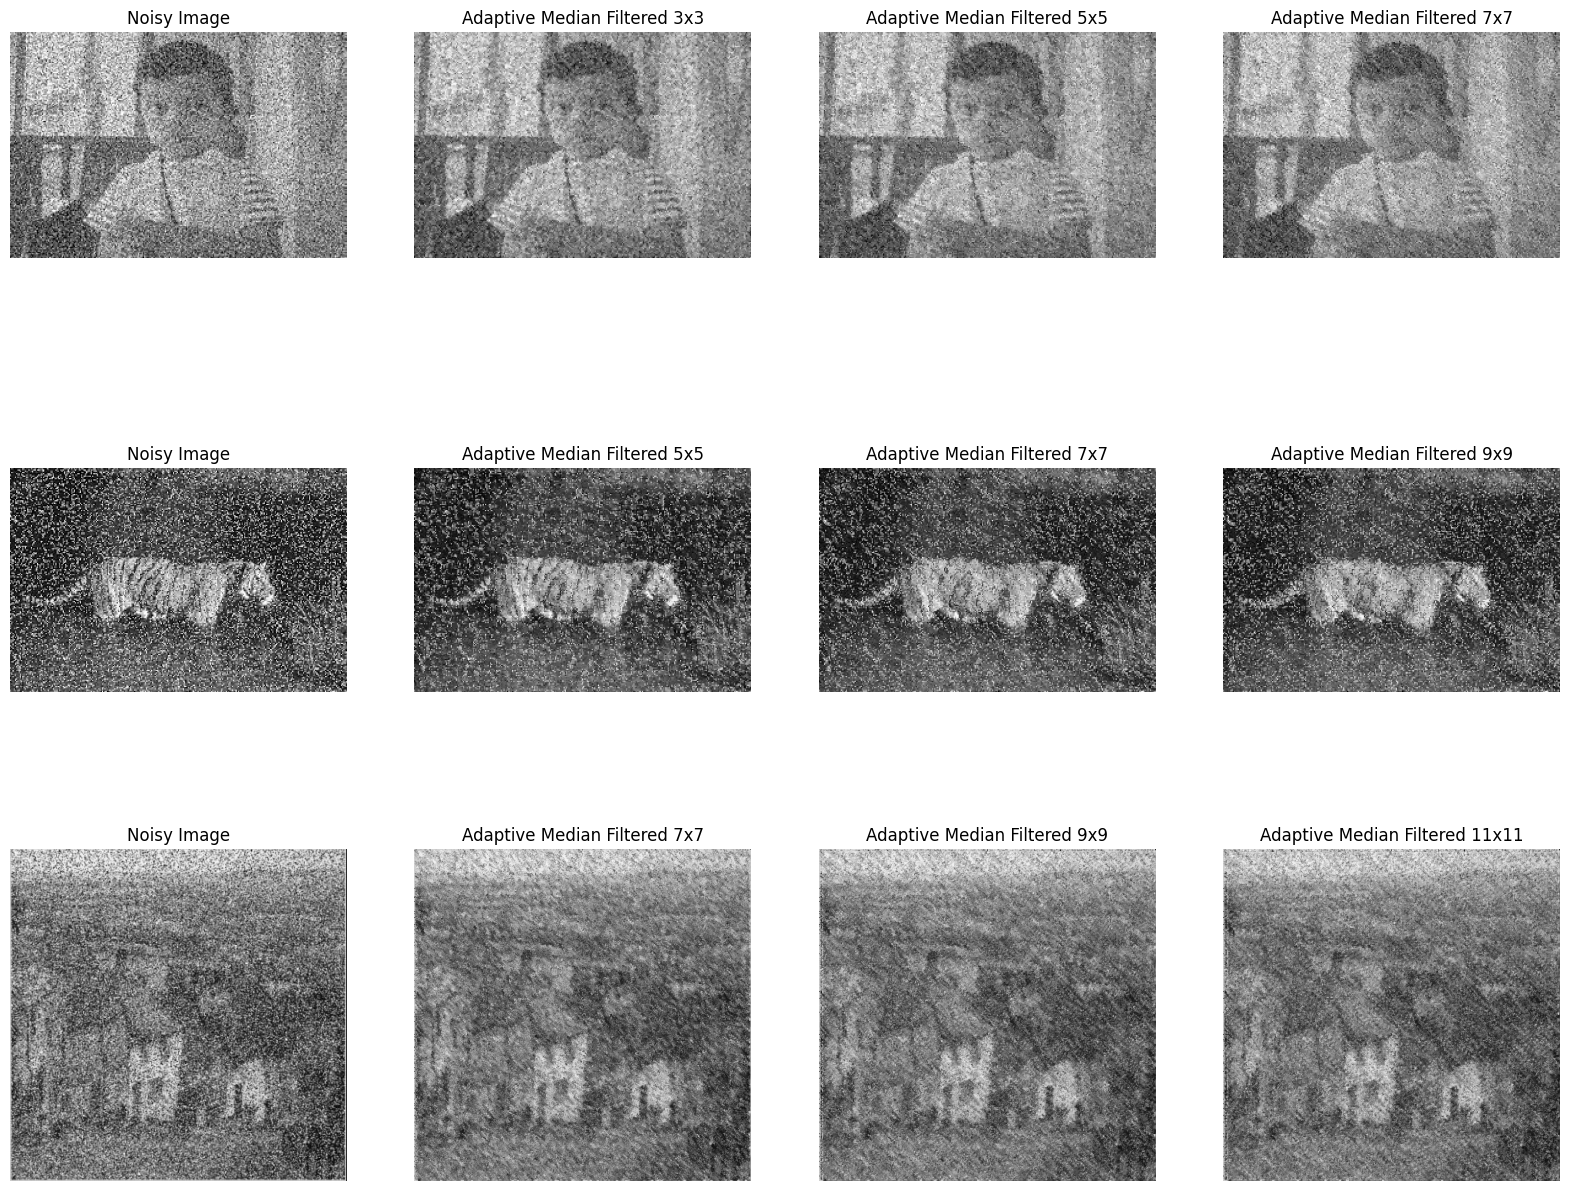

In [ ]:
def adaptive_median_filter(image, S_max):

    #Create a new image of the same size as the input image
    filtered_img = np.zeros_like(image)
    #Apply Zero Padding
    padded_img = np.pad(image, S_max//2, mode='constant')

    #Loop over the image pixels
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            #Initialize the window size
            size = 3
            #Initialize a flag for noise detection
            flag = False
            
            #Loop until noise is detected or maximum size is reached
            while not flag and size <= S_max:
              
                #Get the neighboring pixels
                neighbors = padded_img[i:i+size, j:j+size]
                #sort the neighbors
                neighbors = np.sort(neighbors.ravel())

                #Find the minimum, maximum and median values
                Z_min = neighbors[0]
                Z_max = neighbors[-1]
                Z_median = neighbors[len(neighbors)//2]

                #if the median is a noise
                if Z_min < Z_median < Z_max:

                    #if the current pixel is a noise
                    if Z_min < image[i,j] < Z_max:
                        #Output the current pixel value
                        filtered_img[i,j] = image[i,j]
                    else:
                        #Output the median value
                        filtered_img[i,j] = Z_median

                    #noise flag is true
                    flag = True

                else:
                    size += 2

            #if maximum size is reached and no noise is detected
            if not flag:
               #output the original pixel value
                filtered_img[i,j] = image[i,j]

    return filtered_img

#Apply adaptive median filter to images
def apply_adaptive_median_filter(img, size):
    return adaptive_median_filter(img, size)

images = [img1, img2, img3]
sizes = [[3, 5, 7], [5, 7, 9], [7, 9, 11]]

#Show images
f, subplots = plt.subplots(3, 4, figsize=(20, 16))

for i, img in enumerate(images):
    subplots[i, 0].imshow(img, cmap='gray')
    subplots[i, 0].set_title("Noisy Image")
    subplots[i, 0].axis('off')
    
    for j, size in enumerate(sizes[i]):
        filtered_img = apply_adaptive_median_filter(img, size)
        subplots[i, j+1].imshow(filtered_img, cmap='gray')
        subplots[i, j+1].set_title(f"Adaptive Median Filtered {size}x{size}")
        subplots[i, j+1].axis('off')

plt.show()

**Conclusion**: The best size for the maximum window for each photo is different depending on the amount of noise, but according to the above result, the best value is 7 and 9.